In [98]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.path.realpath('..'))
import pandas as pd

from mgc.independence import *
from mgc.sims import spiral

In [99]:
N = 20

tests = [
    MGC,
    Dcorr,
    HHG,
]

In [100]:
for i in range(N):
    x, y = spiral(100, 1, noise=False)
    sim = np.hstack([x, y])
    np.savetxt('../benchmarks/same_stat/spiral/{}.csv'.format(i+1), sim, delimiter=',')

In [101]:
for test in tests:
    stats = []
    for i in range(N):
        indep_test = test()
        sim = np.genfromtxt('../benchmarks/same_stat/spiral/{}.csv'.format(i+1), delimiter=',')
        x, y = np.hsplit(sim, 2)
        stat = indep_test._statistic(x, y)
        stats.append(stat)
    np.savetxt('../benchmarks/same_stat/{}.csv'.format(test.__name__), stats, delimiter=',')

In [113]:
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

In [128]:
FONTSIZE = 30

def plot_stats():
    fig = plt.figure(figsize=(20,5))
    
    test_names = [
        "MGC",
        "Dcorr",
        "HHG",
    ]
    
    data = np.zeros((N, len(test_names)))
    for i in range(len(test_names)):
        mgc_stat = np.genfromtxt('../benchmarks/same_stat/{}.csv'.format(test_names[i]), delimiter=',')
        r_stat = np.genfromtxt('../benchmarks/same_stat/R{}.csv'.format(test_names[i]), delimiter=',')
        if test_names[i] == "HHG":
            mgc_stat = mgc_stat / (np.max(np.abs(mgc_stat)) * 10)
            r_stat = r_stat / (np.max(np.abs(r_stat)) * 10)
        data[:, i] = mgc_stat - r_stat
    
    data = pd.DataFrame(data=data, columns=test_names)
    sns.violinplot(data=data, inner=None)
    sns.swarmplot(data=data, color="white", edgecolor="gray")
    
    plt.yticks([-0.01, 0, 0.01])
    
    plt.savefig('../benchmarks/figs/same_stat.pdf', transparent=True, bbox_inches='tight')

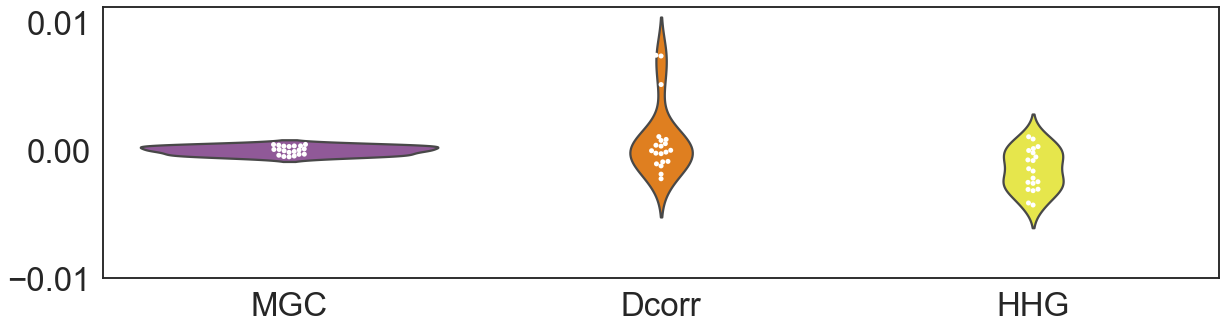

In [129]:
plot_stats()